# modules

In [507]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import os
import plotly.express as px

from sklearn.model_selection import train_test_split

# imputing missing values modulok
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import AddMissingIndicator
from sklearn.impute import KNNImputer
import missingpy as mp

# categorical encoding modulok
from feature_engine.imputation import CategoricalImputer
from sklearn.preprocessing import OneHotEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import WoEEncoder
from feature_engine.encoding import OrdinalEncoder

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier

In [508]:
os.getcwd()

'C:\\Users\\rtom8\\DS_projects_OMG\\H1N1'

In [509]:
os.chdir(r"c:\Users\rtom8\DS_projects_OMG\H1N1")

# original df and label

In [510]:
df = pd.read_csv("training_set_features.csv")

In [511]:
features_df = df.copy()

In [512]:
features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [513]:
labels = pd.read_csv(r"training_set_labels.csv")
labels.drop(["respondent_id"], axis=1, inplace=True)
labels.columns
labels

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1
26705,0,0


In [514]:
rent_df = DataFrame(features_df["rent_or_own"].value_counts(normalize=True)).reset_index()
rent_df

,index,rent_or_own
0,Own,0.759619
1,Rent,0.240381


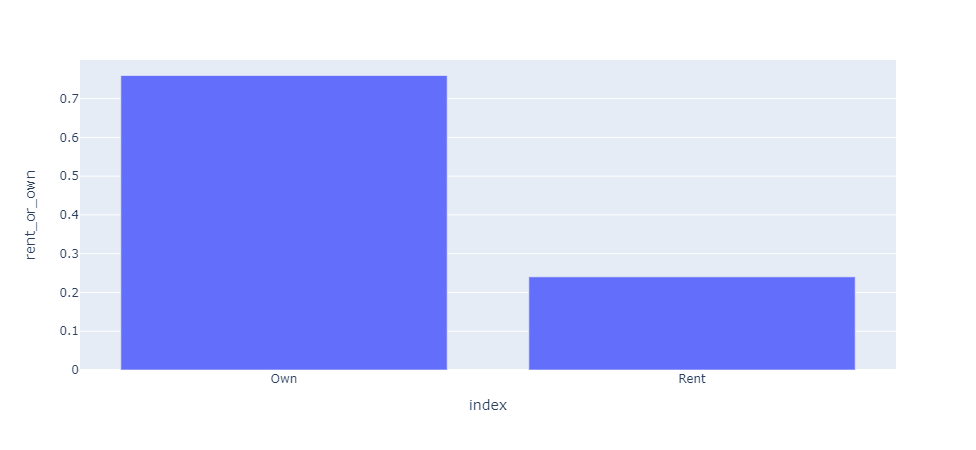

In [515]:
fig = px.bar(data_frame=rent_df, x="index", y="rent_or_own")
fig.show()

# identifying variable types, cardinality

In [516]:
features_df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [517]:
features_df.dtypes.value_counts()

float64    23
object     12
int64       1
dtype: int64

In [518]:
num_vars = features_df.select_dtypes(include="float64")
num_vars.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0


In [519]:
num_vars.select_dtypes(include="float64").columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [520]:
cat_vars = features_df.select_dtypes(include="object")
cat_vars.head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb


In [521]:
num_vars.nunique()

h1n1_concern                   4
h1n1_knowledge                 3
behavioral_antiviral_meds      2
behavioral_avoidance           2
behavioral_face_mask           2
behavioral_wash_hands          2
behavioral_large_gatherings    2
behavioral_outside_home        2
behavioral_touch_face          2
doctor_recc_h1n1               2
doctor_recc_seasonal           2
chronic_med_condition          2
child_under_6_months           2
health_worker                  2
health_insurance               2
opinion_h1n1_vacc_effective    5
opinion_h1n1_risk              5
opinion_h1n1_sick_from_vacc    5
opinion_seas_vacc_effective    5
opinion_seas_risk              5
opinion_seas_sick_from_vacc    5
household_adults               4
household_children             4
dtype: int64

In [522]:
num_vars_col_names = list(num_vars.columns)
num_vars_col_names

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [523]:
cat_vars_col_names = list(cat_vars.columns)
cat_vars_col_names

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

# checking missing values

In [524]:
num_missing_summary_df = DataFrame(num_vars.isnull().mean()*100).reset_index()
num_missing_summary_df.columns = ["var_name", "missing_rate"]
num_missing_summary_df.sort_values(by=["missing_rate"], ascending=False, inplace=True)
num_missing_summary_df

,var_name,missing_rate
14,health_insurance,45.957989
9,doctor_recc_h1n1,8.087767
10,doctor_recc_seasonal,8.087767
11,chronic_med_condition,3.635751
12,child_under_6_months,3.070356
13,health_worker,3.010447
20,opinion_seas_sick_from_vacc,2.010709
19,opinion_seas_risk,1.924589
18,opinion_seas_vacc_effective,1.729884
17,opinion_h1n1_sick_from_vacc,1.479013


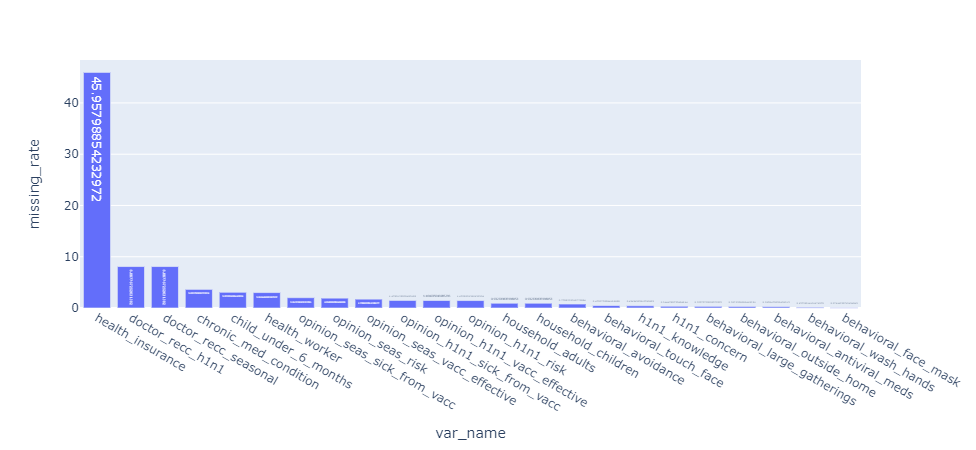

In [525]:
fig = px.bar(data_frame=num_missing_summary_df, x="var_name", y="missing_rate", text="missing_rate")
fig.show()

In [526]:
cat_missing_summary_df = DataFrame(cat_vars.isnull().mean()*100).reset_index()
cat_missing_summary_df.columns = ["var_name", "missing_rate"]
cat_missing_summary_df.sort_values(by=["missing_rate"], ascending=False, inplace=True)
cat_missing_summary_df

,var_name,missing_rate
11,employment_occupation,50.436215
10,employment_industry,49.912008
4,income_poverty,16.561201
6,rent_or_own,7.645936
7,employment_status,5.477965
5,marital_status,5.272026
1,education,5.268282
0,age_group,0.000000
2,race,0.000000
3,sex,0.000000


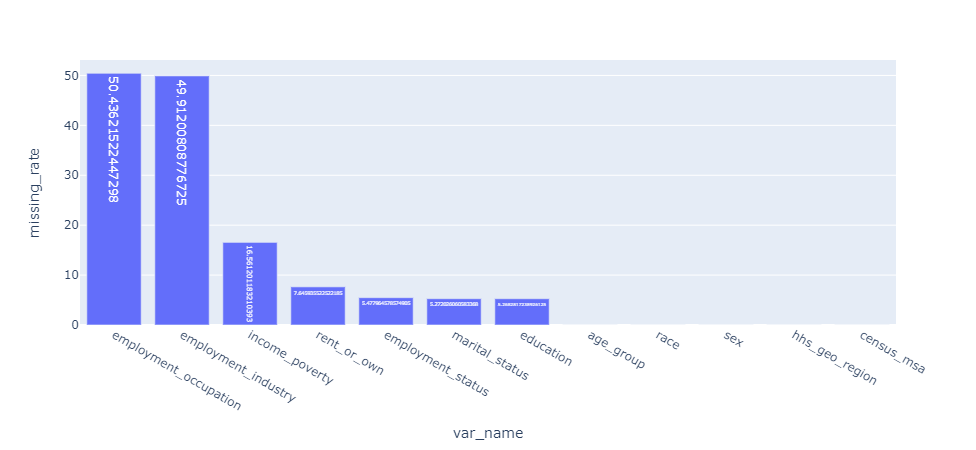

In [527]:
fig = px.bar(data_frame=cat_missing_summary_df, x="var_name", y="missing_rate", text="missing_rate")
fig.show()

In [528]:
num_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [529]:
cat_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age_group              26707 non-null  object
 1   education              25300 non-null  object
 2   race                   26707 non-null  object
 3   sex                    26707 non-null  object
 4   income_poverty         22284 non-null  object
 5   marital_status         25299 non-null  object
 6   rent_or_own            24665 non-null  object
 7   employment_status      25244 non-null  object
 8   hhs_geo_region         26707 non-null  object
 9   census_msa             26707 non-null  object
 10  employment_industry    13377 non-null  object
 11  employment_occupation  13237 non-null  object
dtypes: object(12)
memory usage: 2.4+ MB


In [530]:
num_vars.drop(columns=["health_insurance"], axis=1, inplace=True)
cat_vars.drop(columns=["employment_industry", "employment_occupation"], axis=1, inplace=True)

C:\Users\rtom8\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [531]:
num_vars_col_names = list(num_vars.columns)
num_vars_col_names

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

# missing data handling

In [532]:
# KNN imputer (scikit)
imputer_scikit_KNN = KNNImputer(n_neighbors=5)
imputer_scikit_KNN.fit(num_vars)
num_vars = imputer_scikit_KNN.transform(num_vars)

num_vars = DataFrame(num_vars)
num_vars.columns = num_vars_col_names
num_vars

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0


In [533]:
# átlag, medián imputálás
#imputer_median = MeanMedianImputer(imputation_method="median")
#imputer_mean = MeanMedianImputer(imputation_method="mean")

#imputer_median.fit(num_vars)

#num_vars = imputer_median.transform(num_vars)

# változók medián értékei, amivel imputáltuk a változókat
#imputer_median.imputer_dict_

In [534]:
# leggyakoribb értékkel való imputálás
imputer_most_freq = CategoricalImputer(imputation_method="frequent")
imputer_most_freq.fit(cat_vars)
cat_vars = imputer_most_freq.transform(cat_vars)

In [535]:
cat_vars.isnull().sum()

age_group            0
education            0
race                 0
sex                  0
income_poverty       0
marital_status       0
rent_or_own          0
employment_status    0
hhs_geo_region       0
census_msa           0
dtype: int64

# continous encoding

In [536]:
for variable in num_vars.columns:
    print(variable, num_vars[variable].unique())

h1n1_concern [1.  3.  2.  0.  1.4 1.6 2.2 0.6 1.2 2.8 2.6 2.4 0.4 1.8 0.2 0.8]
h1n1_knowledge [0.  2.  1.  0.6 1.6 0.8 1.2 1.4 0.2 0.4 1.8]
behavioral_antiviral_meds [0.  1.  0.2 0.6 0.4]
behavioral_avoidance [0.  1.  0.6 0.8 0.4 0.2]
behavioral_face_mask [0.  1.  0.2 0.4 0.6]
behavioral_wash_hands [0.  1.  0.4 0.8 0.2 0.6]
behavioral_large_gatherings [0.  1.  0.2 0.6 0.8 0.4]
behavioral_outside_home [1.  0.  0.4 0.2 0.6 0.8]
behavioral_touch_face [1.  0.  0.8 0.4 0.2 0.6]
doctor_recc_h1n1 [0.  1.  0.2 0.4 0.6 0.8]
doctor_recc_seasonal [0.  0.2 1.  0.6 0.4 0.8]
chronic_med_condition [0.  1.  0.6 0.4 0.8 0.2]
child_under_6_months [0.  1.  0.2 0.4 0.6]
health_worker [0.  1.  0.2 0.4 0.6 0.8]
opinion_h1n1_vacc_effective [3.  5.  4.  2.  1.  4.8 3.8 4.4 2.6 3.6 4.2 2.2 3.2 3.4 2.8 4.6 2.4]
opinion_h1n1_risk [1.  4.  3.  2.  5.  1.4 2.2 3.2 1.8 2.8 2.6 1.6 3.4 2.4 3.6 3.8 1.2 4.4
 4.2 4.6]
opinion_h1n1_sick_from_vacc [2.  4.  1.  5.  3.  2.4 1.6 3.6 2.6 2.8 1.2 1.4 1.8 4.8 3.2 3.4 2.2 4.4
 

# categorical encoding

In [537]:
original_cat_columns = list(cat_vars.columns)
original_cat_columns

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa']

In [538]:
for variable in cat_vars.columns:
    print(variable, ":", cat_vars[variable].unique())

age_group : ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education : ['< 12 Years' '12 Years' 'College Graduate' 'Some College']
race : ['White' 'Black' 'Other or Multiple' 'Hispanic']
sex : ['Female' 'Male']
income_poverty : ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
marital_status : ['Not Married' 'Married']
rent_or_own : ['Own' 'Rent']
employment_status : ['Not in Labor Force' 'Employed' 'Unemployed']
hhs_geo_region : ['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
census_msa : ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [539]:
# k-1 OHE, binarize
cat_vars["sex_binary"] = pd.get_dummies(cat_vars["sex"], drop_first=True)
cat_vars["marital_status_binary"] = pd.get_dummies(cat_vars["marital_status"], drop_first=True)
cat_vars["rent_or_own_binary"] = pd.get_dummies(cat_vars["rent_or_own"], drop_first=True)
cat_vars

# ugyanaz az eredménye mint a fenti megoldásnak
# cat_vars["sex_binary"] = np.where(cat_vars["sex"].str.contains("Female"), 1, 0)

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,sex_binary,marital_status_binary,rent_or_own_binary
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,1,0
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",1,1,1
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,1,0
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,1,1
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0,1,0
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1,1,1
26704,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0,1,0
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,0,0,1


In [540]:
# k OHE
ohe_cols = ["race", "employment_status"]

one_hot_encoder = OneHotEncoder(variables=ohe_cols, top_categories=None)
one_hot_encoder.fit(cat_vars)
cat_vars = one_hot_encoder.transform(cat_vars)
cat_vars

,age_group,education,sex,income_poverty,marital_status,rent_or_own,hhs_geo_region,census_msa,sex_binary,marital_status_binary,rent_or_own_binary,race_White,race_Black,race_Other or Multiple,race_Hispanic,employment_status_Not in Labor Force,employment_status_Employed,employment_status_Unemployed
0,55 - 64 Years,< 12 Years,Female,Below Poverty,Not Married,Own,oxchjgsf,Non-MSA,0,1,0,1,0,0,0,1,0,0
1,35 - 44 Years,12 Years,Male,Below Poverty,Not Married,Rent,bhuqouqj,"MSA, Not Principle City",1,1,1,1,0,0,0,0,1,0
2,18 - 34 Years,College Graduate,Male,"<= $75,000, Above Poverty",Not Married,Own,qufhixun,"MSA, Not Principle City",1,1,0,1,0,0,0,0,1,0
3,65+ Years,12 Years,Female,Below Poverty,Not Married,Rent,lrircsnp,"MSA, Principle City",0,1,1,1,0,0,0,1,0,0
4,45 - 54 Years,Some College,Female,"<= $75,000, Above Poverty",Married,Own,qufhixun,"MSA, Not Principle City",0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,Female,"<= $75,000, Above Poverty",Not Married,Own,qufhixun,Non-MSA,0,1,0,1,0,0,0,1,0,0
26703,18 - 34 Years,College Graduate,Male,"<= $75,000, Above Poverty",Not Married,Rent,lzgpxyit,"MSA, Principle City",1,1,1,1,0,0,0,0,1,0
26704,55 - 64 Years,Some College,Female,"<= $75,000, Above Poverty",Not Married,Own,lzgpxyit,"MSA, Not Principle City",0,1,0,1,0,0,0,0,1,0
26705,18 - 34 Years,Some College,Female,"<= $75,000, Above Poverty",Married,Rent,lrircsnp,Non-MSA,0,0,1,0,0,0,1,0,1,0


In [541]:
# ordinal encoding
ordinal_cols = ["education", "income_poverty"]

cat_vars_ordinal_map = {
    "education":{
        "< 12 Years":1,
        "12 Years":2,
        "Some College":3,
        "College Graduate":4
    },
    "income_poverty":{
        "Below Poverty":1,
        "<= $75,000, Above Poverty":2,
        "> $75,000":3
    }
}

ordinal_vars = cat_vars.replace(to_replace=cat_vars_ordinal_map)
ordinal_vars

,age_group,education,sex,income_poverty,marital_status,rent_or_own,hhs_geo_region,census_msa,sex_binary,marital_status_binary,rent_or_own_binary,race_White,race_Black,race_Other or Multiple,race_Hispanic,employment_status_Not in Labor Force,employment_status_Employed,employment_status_Unemployed
0,55 - 64 Years,1,Female,1,Not Married,Own,oxchjgsf,Non-MSA,0,1,0,1,0,0,0,1,0,0
1,35 - 44 Years,2,Male,1,Not Married,Rent,bhuqouqj,"MSA, Not Principle City",1,1,1,1,0,0,0,0,1,0
2,18 - 34 Years,4,Male,2,Not Married,Own,qufhixun,"MSA, Not Principle City",1,1,0,1,0,0,0,0,1,0
3,65+ Years,2,Female,1,Not Married,Rent,lrircsnp,"MSA, Principle City",0,1,1,1,0,0,0,1,0,0
4,45 - 54 Years,3,Female,2,Married,Own,qufhixun,"MSA, Not Principle City",0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,3,Female,2,Not Married,Own,qufhixun,Non-MSA,0,1,0,1,0,0,0,1,0,0
26703,18 - 34 Years,4,Male,2,Not Married,Rent,lzgpxyit,"MSA, Principle City",1,1,1,1,0,0,0,0,1,0
26704,55 - 64 Years,3,Female,2,Not Married,Own,lzgpxyit,"MSA, Not Principle City",0,1,0,1,0,0,0,0,1,0
26705,18 - 34 Years,3,Female,2,Married,Rent,lrircsnp,Non-MSA,0,0,1,0,0,0,1,0,1,0


In [542]:
# kategóriaközök számítása

age_map = {'age_group':
           {'55 - 64 Years':'55-64',
            '35 - 44 Years':'35-44',
            '18 - 34 Years':'18-34',
            '65+ Years':'65-74',
            '45 - 54 Years':'45-54'}
          }
cat_vars.replace(to_replace=age_map, inplace=True)

def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0]) + float(split_list[1]))/2
    return mean

cat_vars["age_group_mean"] = cat_vars["age_group"].apply(lambda x: split_mean(x))

cat_vars

,age_group,education,sex,income_poverty,marital_status,rent_or_own,hhs_geo_region,census_msa,sex_binary,marital_status_binary,rent_or_own_binary,race_White,race_Black,race_Other or Multiple,race_Hispanic,employment_status_Not in Labor Force,employment_status_Employed,employment_status_Unemployed,age_group_mean
0,55-64,< 12 Years,Female,Below Poverty,Not Married,Own,oxchjgsf,Non-MSA,0,1,0,1,0,0,0,1,0,0,59.5
1,35-44,12 Years,Male,Below Poverty,Not Married,Rent,bhuqouqj,"MSA, Not Principle City",1,1,1,1,0,0,0,0,1,0,39.5
2,18-34,College Graduate,Male,"<= $75,000, Above Poverty",Not Married,Own,qufhixun,"MSA, Not Principle City",1,1,0,1,0,0,0,0,1,0,26.0
3,65-74,12 Years,Female,Below Poverty,Not Married,Rent,lrircsnp,"MSA, Principle City",0,1,1,1,0,0,0,1,0,0,69.5
4,45-54,Some College,Female,"<= $75,000, Above Poverty",Married,Own,qufhixun,"MSA, Not Principle City",0,0,0,1,0,0,0,0,1,0,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65-74,Some College,Female,"<= $75,000, Above Poverty",Not Married,Own,qufhixun,Non-MSA,0,1,0,1,0,0,0,1,0,0,69.5
26703,18-34,College Graduate,Male,"<= $75,000, Above Poverty",Not Married,Rent,lzgpxyit,"MSA, Principle City",1,1,1,1,0,0,0,0,1,0,26.0
26704,55-64,Some College,Female,"<= $75,000, Above Poverty",Not Married,Own,lzgpxyit,"MSA, Not Principle City",0,1,0,1,0,0,0,0,1,0,59.5
26705,18-34,Some College,Female,"<= $75,000, Above Poverty",Married,Rent,lrircsnp,Non-MSA,0,0,1,0,0,0,1,0,1,0,26.0


In [543]:
# frequency encoding
freq_encode_cols = ["age_group", "education", "sex", "income_poverty", "marital_status", "rent_or_own"]

frequency_encoder = CountFrequencyEncoder(encoding_method="frequency", variables=freq_encode_cols)
frequency_encoder.fit(cat_vars)
cat_vars = frequency_encoder.transform(cat_vars)
cat_vars

,age_group,education,sex,income_poverty,marital_status,rent_or_own,hhs_geo_region,census_msa,sex_binary,marital_status_binary,rent_or_own_binary,race_White,race_Black,race_Other or Multiple,race_Hispanic,employment_status_Not in Labor Force,employment_status_Employed,employment_status_Unemployed,age_group_mean
0,0.208297,0.088479,0.593777,0.100985,0.439735,0.777998,oxchjgsf,Non-MSA,0,1,0,1,0,0,0,1,0,0,59.5
1,0.144082,0.217059,0.406223,0.100985,0.439735,0.222002,bhuqouqj,"MSA, Not Principle City",1,1,1,1,0,0,0,0,1,0,39.5
2,0.195267,0.430748,0.406223,0.644026,0.439735,0.777998,qufhixun,"MSA, Not Principle City",1,1,0,1,0,0,0,0,1,0,26.0
3,0.256225,0.217059,0.593777,0.100985,0.439735,0.222002,lrircsnp,"MSA, Principle City",0,1,1,1,0,0,0,1,0,0,69.5
4,0.196128,0.263714,0.593777,0.644026,0.560265,0.777998,qufhixun,"MSA, Not Principle City",0,0,0,1,0,0,0,0,1,0,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.256225,0.263714,0.593777,0.644026,0.439735,0.777998,qufhixun,Non-MSA,0,1,0,1,0,0,0,1,0,0,69.5
26703,0.195267,0.430748,0.406223,0.644026,0.439735,0.222002,lzgpxyit,"MSA, Principle City",1,1,1,1,0,0,0,0,1,0,26.0
26704,0.208297,0.263714,0.593777,0.644026,0.439735,0.777998,lzgpxyit,"MSA, Not Principle City",0,1,0,1,0,0,0,0,1,0,59.5
26705,0.195267,0.263714,0.593777,0.644026,0.560265,0.222002,lrircsnp,Non-MSA,0,0,1,0,0,0,1,0,1,0,26.0


In [544]:
cat_vars.columns

Index(['age_group', 'education', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'hhs_geo_region', 'census_msa', 'sex_binary',
       'marital_status_binary', 'rent_or_own_binary', 'race_White',
       'race_Black', 'race_Other or Multiple', 'race_Hispanic',
       'employment_status_Not in Labor Force', 'employment_status_Employed',
       'employment_status_Unemployed', 'age_group_mean'],
      dtype='object')

In [545]:
too_many_cat_cols = list(cat_vars.select_dtypes(include="object").columns)
too_many_cat_cols

['hhs_geo_region', 'census_msa']

In [546]:
cat_vars.drop(columns=too_many_cat_cols, axis=1, inplace=True)
features_df = pd.concat([num_vars, cat_vars], axis=1)
features_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status_binary,rent_or_own_binary,race_White,race_Black,race_Other or Multiple,race_Hispanic,employment_status_Not in Labor Force,employment_status_Employed,employment_status_Unemployed,age_group_mean
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,1,0,0,0,1,0,0,59.5
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,1,1,0,0,0,0,1,0,39.5
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,1,0,26.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,1,1,0,0,0,1,0,0,69.5
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,1,0,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0,0,1,0,0,69.5
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,1,1,0,0,0,0,1,0,26.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1,0,1,0,0,0,0,1,0,59.5
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,1,0,26.0


# X_test

In [547]:
validation_set_X = pd.read_csv(r"test_set_features.csv")

In [548]:
num_vars = validation_set_X.select_dtypes(include="float64")
num_vars.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,0.0,1.0


In [549]:
cat_vars = validation_set_X.select_dtypes(include="object")
cat_vars.head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",atmlpfrs,hfxkjkmi
1,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,atmlpfrs,xqwwgdyp
2,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,nduyfdeo,pvmttkik
3,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",NaN,NaN
4,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,fcxhlnwr,mxkfnird


In [550]:
num_vars.drop(columns=["health_insurance"], axis=1, inplace=True)
cat_vars.drop(columns=["employment_industry", "employment_occupation"], axis=1, inplace=True)

C:\Users\rtom8\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [551]:
num_vars_col_names = list(num_vars.columns)
num_vars_col_names

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [552]:
cat_vars_col_names = list(cat_vars.columns)
cat_vars_col_names

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa']

In [553]:
# KNN imputer (scikit)
imputer_scikit_KNN = KNNImputer(n_neighbors=5)
imputer_scikit_KNN.fit(num_vars)
num_vars = imputer_scikit_KNN.transform(num_vars)

num_vars = DataFrame(num_vars)
num_vars.columns = num_vars_col_names
num_vars

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,4.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,4.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0
26704,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,4.0,1.0,1.0,5.0,2.0,2.0,1.0,3.0
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,3.0,1.0,4.0,3.0,1.0,1.0,0.0
26706,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,3.0,4.0,4.0,3.0,2.0,1.0,0.0


In [554]:
# leggyakoribb értékkel való imputálás
imputer_most_freq = CategoricalImputer(imputation_method="frequent")
imputer_most_freq.fit(cat_vars)
cat_vars = imputer_most_freq.transform(cat_vars)

In [555]:
# k-1 OHE, binarize
cat_vars["sex_binary"] = pd.get_dummies(cat_vars["sex"], drop_first=True)
cat_vars["marital_status_binary"] = pd.get_dummies(cat_vars["marital_status"], drop_first=True)
cat_vars["rent_or_own_binary"] = pd.get_dummies(cat_vars["rent_or_own"], drop_first=True)
cat_vars

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,sex_binary,marital_status_binary,rent_or_own_binary
0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",0,1,1
1,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,1,1,1
2,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1,0,0
3,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",0,0,0
4,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,35 - 44 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,dqpwygqj,"MSA, Principle City",0,0,0
26704,18 - 34 Years,12 Years,White,Male,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1,0,1
26705,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",0,1,1
26706,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",0,0,0


In [556]:
# k OHE
ohe_cols = ["race", "employment_status"]

one_hot_encoder = OneHotEncoder(variables=ohe_cols, top_categories=None)
one_hot_encoder.fit(cat_vars)
cat_vars = one_hot_encoder.transform(cat_vars)
cat_vars

,age_group,education,sex,income_poverty,marital_status,rent_or_own,hhs_geo_region,census_msa,sex_binary,marital_status_binary,rent_or_own_binary,race_Hispanic,race_White,race_Black,race_Other or Multiple,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed
0,35 - 44 Years,College Graduate,Female,"> $75,000",Not Married,Rent,mlyzmhmf,"MSA, Not Principle City",0,1,1,1,0,0,0,1,0,0
1,18 - 34 Years,12 Years,Male,Below Poverty,Not Married,Rent,bhuqouqj,Non-MSA,1,1,1,0,1,0,0,1,0,0
2,55 - 64 Years,College Graduate,Male,"> $75,000",Married,Own,lrircsnp,Non-MSA,1,0,0,0,1,0,0,1,0,0
3,65+ Years,12 Years,Female,"<= $75,000, Above Poverty",Married,Own,lrircsnp,"MSA, Not Principle City",0,0,0,0,1,0,0,0,1,0
4,35 - 44 Years,12 Years,Female,"<= $75,000, Above Poverty",Not Married,Own,lzgpxyit,Non-MSA,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,35 - 44 Years,College Graduate,Female,"<= $75,000, Above Poverty",Married,Own,dqpwygqj,"MSA, Principle City",0,0,0,0,1,0,0,1,0,0
26704,18 - 34 Years,12 Years,Male,Below Poverty,Married,Rent,qufhixun,Non-MSA,1,0,1,0,1,0,0,1,0,0
26705,18 - 34 Years,Some College,Female,Below Poverty,Not Married,Rent,qufhixun,"MSA, Not Principle City",0,1,1,0,1,0,0,0,1,0
26706,55 - 64 Years,Some College,Female,"<= $75,000, Above Poverty",Married,Own,bhuqouqj,"MSA, Not Principle City",0,0,0,0,1,0,0,0,1,0


In [557]:
# ordinal encoding
ordinal_cols = ["education", "income_poverty"]

cat_vars_ordinal_map = {
    "education":{
        "< 12 Years":1,
        "12 Years":2,
        "Some College":3,
        "College Graduate":4
    },
    "income_poverty":{
        "Below Poverty":1,
        "<= $75,000, Above Poverty":2,
        "> $75,000":3
    }
}

ordinal_vars = cat_vars.replace(to_replace=cat_vars_ordinal_map)
ordinal_vars

,age_group,education,sex,income_poverty,marital_status,rent_or_own,hhs_geo_region,census_msa,sex_binary,marital_status_binary,rent_or_own_binary,race_Hispanic,race_White,race_Black,race_Other or Multiple,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed
0,35 - 44 Years,4,Female,3,Not Married,Rent,mlyzmhmf,"MSA, Not Principle City",0,1,1,1,0,0,0,1,0,0
1,18 - 34 Years,2,Male,1,Not Married,Rent,bhuqouqj,Non-MSA,1,1,1,0,1,0,0,1,0,0
2,55 - 64 Years,4,Male,3,Married,Own,lrircsnp,Non-MSA,1,0,0,0,1,0,0,1,0,0
3,65+ Years,2,Female,2,Married,Own,lrircsnp,"MSA, Not Principle City",0,0,0,0,1,0,0,0,1,0
4,35 - 44 Years,2,Female,2,Not Married,Own,lzgpxyit,Non-MSA,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,35 - 44 Years,4,Female,2,Married,Own,dqpwygqj,"MSA, Principle City",0,0,0,0,1,0,0,1,0,0
26704,18 - 34 Years,2,Male,1,Married,Rent,qufhixun,Non-MSA,1,0,1,0,1,0,0,1,0,0
26705,18 - 34 Years,3,Female,1,Not Married,Rent,qufhixun,"MSA, Not Principle City",0,1,1,0,1,0,0,0,1,0
26706,55 - 64 Years,3,Female,2,Married,Own,bhuqouqj,"MSA, Not Principle City",0,0,0,0,1,0,0,0,1,0


In [558]:
# kategóriaközök számítása

age_map = {'age_group':
           {'55 - 64 Years':'55-64',
            '35 - 44 Years':'35-44',
            '18 - 34 Years':'18-34',
            '65+ Years':'65-74',
            '45 - 54 Years':'45-54'}
          }
cat_vars.replace(to_replace=age_map, inplace=True)

def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0]) + float(split_list[1]))/2
    return mean

cat_vars["age_group_mean"] = cat_vars["age_group"].apply(lambda x: split_mean(x))

cat_vars

,age_group,education,sex,income_poverty,marital_status,rent_or_own,hhs_geo_region,census_msa,sex_binary,marital_status_binary,rent_or_own_binary,race_Hispanic,race_White,race_Black,race_Other or Multiple,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,age_group_mean
0,35-44,College Graduate,Female,"> $75,000",Not Married,Rent,mlyzmhmf,"MSA, Not Principle City",0,1,1,1,0,0,0,1,0,0,39.5
1,18-34,12 Years,Male,Below Poverty,Not Married,Rent,bhuqouqj,Non-MSA,1,1,1,0,1,0,0,1,0,0,26.0
2,55-64,College Graduate,Male,"> $75,000",Married,Own,lrircsnp,Non-MSA,1,0,0,0,1,0,0,1,0,0,59.5
3,65-74,12 Years,Female,"<= $75,000, Above Poverty",Married,Own,lrircsnp,"MSA, Not Principle City",0,0,0,0,1,0,0,0,1,0,69.5
4,35-44,12 Years,Female,"<= $75,000, Above Poverty",Not Married,Own,lzgpxyit,Non-MSA,0,1,0,0,0,1,0,1,0,0,39.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,35-44,College Graduate,Female,"<= $75,000, Above Poverty",Married,Own,dqpwygqj,"MSA, Principle City",0,0,0,0,1,0,0,1,0,0,39.5
26704,18-34,12 Years,Male,Below Poverty,Married,Rent,qufhixun,Non-MSA,1,0,1,0,1,0,0,1,0,0,26.0
26705,18-34,Some College,Female,Below Poverty,Not Married,Rent,qufhixun,"MSA, Not Principle City",0,1,1,0,1,0,0,0,1,0,26.0
26706,55-64,Some College,Female,"<= $75,000, Above Poverty",Married,Own,bhuqouqj,"MSA, Not Principle City",0,0,0,0,1,0,0,0,1,0,59.5


In [559]:
# frequency encoding
freq_encode_cols = ["age_group", "education", "sex", "income_poverty", "marital_status", "rent_or_own"]

frequency_encoder = CountFrequencyEncoder(encoding_method="frequency", variables=freq_encode_cols)
frequency_encoder.fit(cat_vars)
cat_vars = frequency_encoder.transform(cat_vars)
cat_vars

,age_group,education,sex,income_poverty,marital_status,rent_or_own,hhs_geo_region,census_msa,sex_binary,marital_status_binary,rent_or_own_binary,race_Hispanic,race_White,race_Black,race_Other or Multiple,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,age_group_mean
0,0.148645,0.434065,0.592856,0.256964,0.438745,0.222817,mlyzmhmf,"MSA, Not Principle City",0,1,1,1,0,0,0,1,0,0,39.5
1,0.195971,0.213382,0.407144,0.096338,0.438745,0.222817,bhuqouqj,Non-MSA,1,1,1,0,1,0,0,1,0,0,26.0
2,0.207017,0.434065,0.407144,0.256964,0.561255,0.777183,lrircsnp,Non-MSA,1,0,0,0,1,0,0,1,0,0,59.5
3,0.251535,0.213382,0.592856,0.646698,0.561255,0.777183,lrircsnp,"MSA, Not Principle City",0,0,0,0,1,0,0,0,1,0,69.5
4,0.148645,0.213382,0.592856,0.646698,0.438745,0.777183,lzgpxyit,Non-MSA,0,1,0,0,0,1,0,1,0,0,39.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,0.148645,0.434065,0.592856,0.646698,0.561255,0.777183,dqpwygqj,"MSA, Principle City",0,0,0,0,1,0,0,1,0,0,39.5
26704,0.195971,0.213382,0.407144,0.096338,0.561255,0.222817,qufhixun,Non-MSA,1,0,1,0,1,0,0,1,0,0,26.0
26705,0.195971,0.265089,0.592856,0.096338,0.438745,0.222817,qufhixun,"MSA, Not Principle City",0,1,1,0,1,0,0,0,1,0,26.0
26706,0.207017,0.265089,0.592856,0.646698,0.561255,0.777183,bhuqouqj,"MSA, Not Principle City",0,0,0,0,1,0,0,0,1,0,59.5


In [560]:
too_many_cat_cols = list(cat_vars.select_dtypes(include="object").columns)
too_many_cat_cols

['hhs_geo_region', 'census_msa']

In [561]:
cat_vars.drop(columns=too_many_cat_cols, axis=1, inplace=True)

In [562]:
validation_set_X = pd.concat([num_vars, cat_vars], axis=1)
validation_set_X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'age_group', 'education', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'sex_binary', 'marital_status_binary',
       'rent_or_own_binary', 'race_Hispanic', 'race_White', 'race_Black',
       'race_Other or Multiple', 'employment_status_Employed',
       'employment_status_Not in Labor Force', 'employment_status_Unemployed',
       'age_group_mean'],
      dtype='object')

# train_test split

In [563]:
X_train, X_test, y_train, y_test = train_test_split(
    features_df,
    labels,
    test_size=0.25,
    stratify=labels
)

In [564]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20030, 39)
(20030, 2)
(6677, 39)
(6677, 2)


In [565]:
X_train.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'age_group', 'education', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'sex_binary', 'marital_status_binary',
       'rent_or_own_binary', 'race_White', 'race_Black',
       'race_Other or Multiple', 'race_Hispanic',
       'employment_status_Not in Labor Force', 'employment_status_Employed',
       'employment_status_Unemployed', 'age_group_mean'],
      dtype='object')

In [566]:
X_test.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'age_group', 'education', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'sex_binary', 'marital_status_binary',
       'rent_or_own_binary', 'race_White', 'race_Black',
       'race_Other or Multiple', 'race_Hispanic',
       'employment_status_Not in Labor Force', 'employment_status_Employed',
       'employment_status_Unemployed', 'age_group_mean'],
      dtype='object')

In [567]:
y_train.columns

Index(['h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [568]:
y_test.columns

Index(['h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [569]:
X_test = X_test[X_train.columns]

# gridsearch

# modeling

In [574]:
clf = MultiOutputClassifier(XGBClassifier()).fit(X_train, y_train)
predicitions = clf.predict(X_test)
roc_auc_score(y_test, predicitions)

C:\Users\rtom8\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7263302235428284

# Submission

In [573]:
model = MultiOutputClassifier(XGBClassifier()).fit(X_train, y_train)
predictions = model.predict(validation_set_X)

C:\Users\rtom8\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:30:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [418]:
submission = pd.read_csv(r"c:\Users\rtom8\DS_projects_OMG\H1N1\submission_format.csv")

In [420]:
for col in submission.columns[1:]:
    submission[col].values[:] = 0
    
submission["h1n1_vaccine"] = model.predict_proba(validation_set_X)[0][:, 1]
submission["seasonal_vaccine"] = model.predict_proba(validation_set_X)[1][:, 1]

submission.to_csv("flushot.csv", index=False)

submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   respondent_id     26708 non-null  int64  
 1   h1n1_vaccine      26708 non-null  float32
 2   seasonal_vaccine  26708 non-null  float32
dtypes: float32(2), int64(1)
memory usage: 417.4 KB
